# Prediction Using Decision Tree Algorithm

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing dataset
data = pd.read_csv('/content/Iris.csv',index_col=0)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [4]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualization of Data

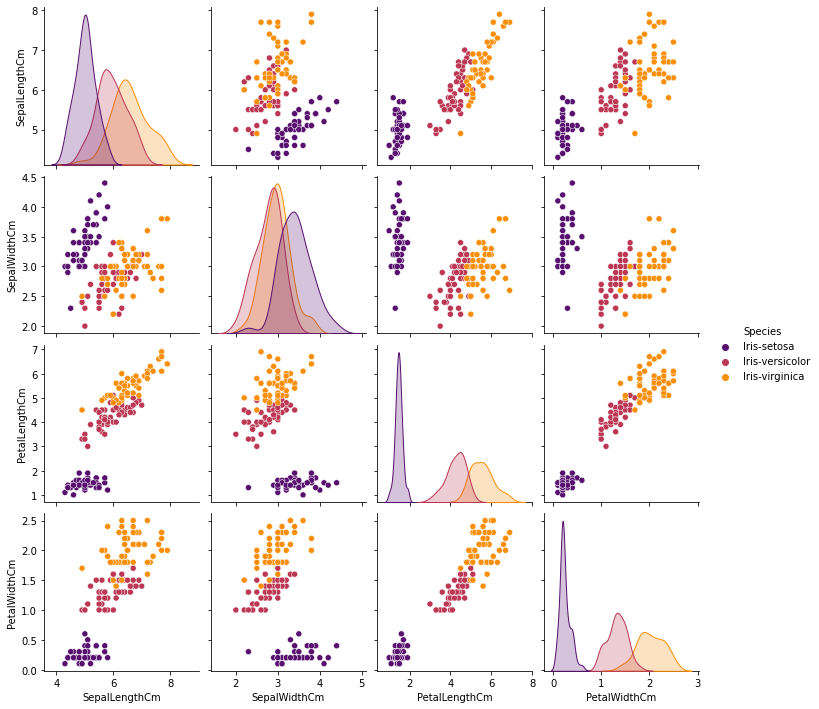

In [5]:
sns.pairplot(data, hue= 'Species',palette = 'inferno')

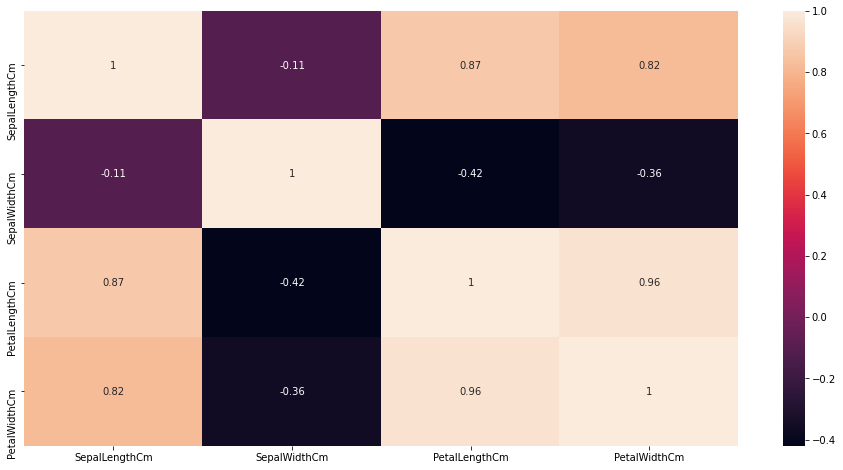

In [6]:
corrdata = data.corr()
ax,fig = plt.subplots(figsize=(16,8))
sns.heatmap(corrdata,annot=True)

## Data Preprocessing

In [7]:
Y = data["Species"].values
X = data.drop("Species", axis=1).values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
#splitting the dataset to testing and training in the ratio 80:20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 1)

In [11]:
print("Training split:", X_train.shape)
print("Testing split:", X_test.shape)

Training split: (120, 4)
Testing split: (30, 4)


## Training the Data

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
Y_pred = d_tree.predict(X_test)
print("Classification report:\n", classification_report(Y_test, Y_pred))

Classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [23]:
c_matrix = confusion_matrix(Y_test, Y_pred)
c_matrix

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

## Visualization of the Tree

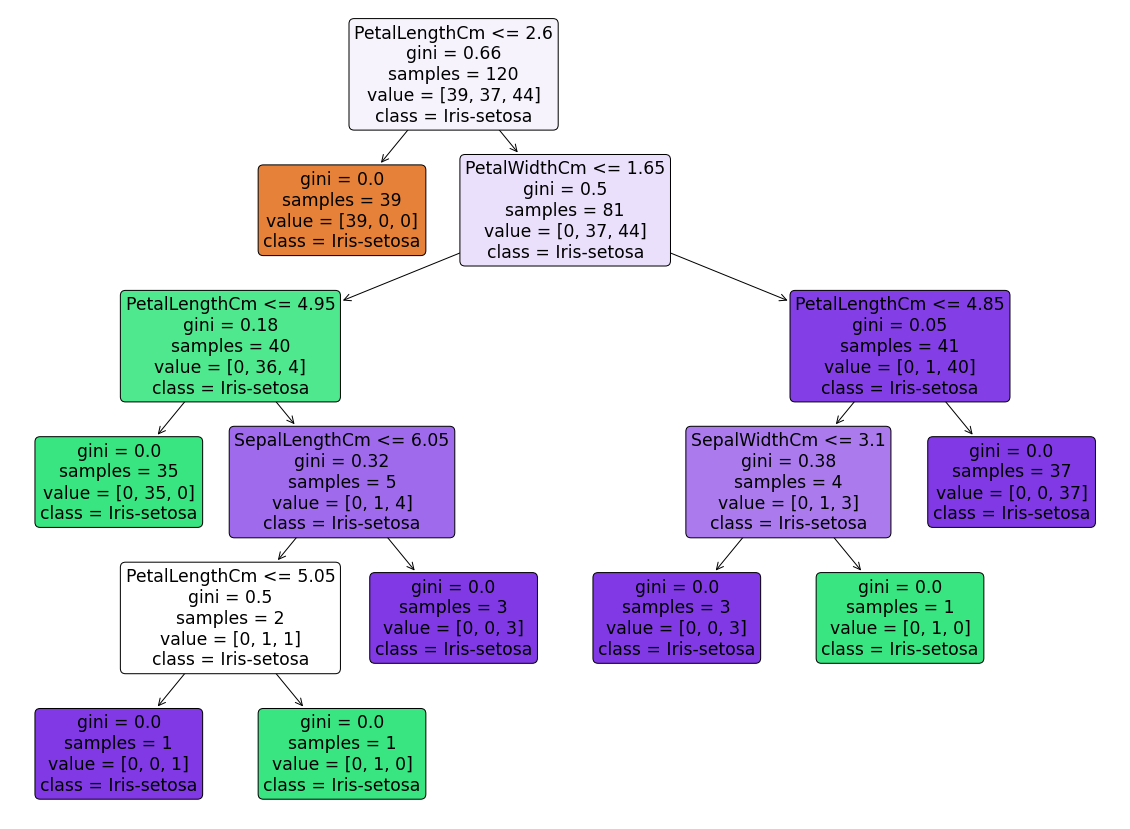

In [36]:
fig = plt.figure(figsize=(20,15))
tree = plot_tree(d_tree, feature_names = data.columns, precision=2, rounded=True, filled=True, class_names=Y)